```
Student-1
Name: Kazi Rubab Bashar
ID# 20-43661-2
```

```
Student-2
Name: Shajid Kamal Joy
ID# 20-43677-2
```



*   Mount your google drive.



In [1]:
# mount google drive if you are using Colab
# otherewise, leave it blank

# start writing your code here



*   Import necessary libraries.



In [2]:
# load/import all required library

# start writing your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [3]:
# write task-1 solution

# start writing your code here

df = pd.read_csv("data.csv")
print(df)

     sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0         Mkt&HR 

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [4]:
# write task-2 solution

# start writing your code here

column_to_drop = 'salary'
if column_to_drop in df.columns:
    df = df.drop(column_to_drop, axis=1)

column_to_drop = 'sl_no'
if column_to_drop in df.columns:
    df = df.drop(column_to_drop, axis=1)

df.info()

unique_values_count_column1 = df['gender'].nunique()
unique_values_count_column2 = df['ssc_b'].nunique()
unique_values_count_column3 = df['hsc_b'].nunique()
unique_values_count_column4 = df['hsc_s'].nunique()
unique_values_count_column5 = df['degree_t'].nunique()
unique_values_count_column6 = df['workex'].nunique()
unique_values_count_column7 = df['specialisation'].nunique()
unique_values_count_column8 = df['status'].nunique()


unique_values_column1 = df['gender'].unique()
unique_values_column2 = df['ssc_b'].unique()
unique_values_column3 = df['hsc_b'].unique()
unique_values_column4 = df['hsc_s'].unique()
unique_values_column5 = df['degree_t'].unique()
unique_values_column6 = df['workex'].unique()
unique_values_column7 = df['specialisation'].unique()
unique_values_column8 = df['status'].unique()


print("Number of unique values in 'gender':", unique_values_count_column1)
print("Unique values in 'gender':", unique_values_column1)

print("\nNumber of unique values in 'ssc_b':", unique_values_count_column2)
print("Unique values in 'ssc_b':", unique_values_column2)

print("\nNumber of unique values in 'hsc_b':", unique_values_count_column3)
print("Unique values in 'hsc_b':", unique_values_column3)

print("\nNumber of unique values in 'hsc_s':", unique_values_count_column4)
print("Unique values in 'hsc_s':", unique_values_column4)

print("\nNumber of unique values in 'degree_t':", unique_values_count_column5)
print("Unique values in 'degree_t':", unique_values_column5)

print("\nNumber of unique values in 'workex':", unique_values_count_column6)
print("Unique values in 'workex':", unique_values_column6)

print("\nNumber of unique values in 'specialisation':", unique_values_count_column7)
print("Unique values in 'specialisation':", unique_values_column7)

print("\nNumber of unique values in 'status':", unique_values_count_column8)
print("Unique values in 'status':", unique_values_column8)

mapping_dict = {
    'gender': {'M': 1, 'F': 2},
    'ssc_b': {'Others': 1, 'Central': 2},
    'hsc_b': {'Others': 1, 'Central': 2},
    'hsc_s': {'Commerce': 1, 'Science': 2, 'Arts': 3},
    'degree_t': {'Sci&Tech': 1, 'Comm&Mgmt': 2, 'Others': 3},
    'workex': {'No': 0, 'Yes': 1},
    'specialisation': {'Mkt&HR': 1, 'Mkt&Fin': 2},
    'status': {'Not Placed': 0, 'Placed': 1}
}

df.replace(mapping_dict, inplace=True)

print("DataFrame after replacing values:")
print(df)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB
Number of unique values in 'gender': 2
Unique values in 'gender': ['M' 'F']

Number of unique values in 'ssc_b': 2
Unique values in 'ssc_b': ['Others' 'Central']

Numb

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

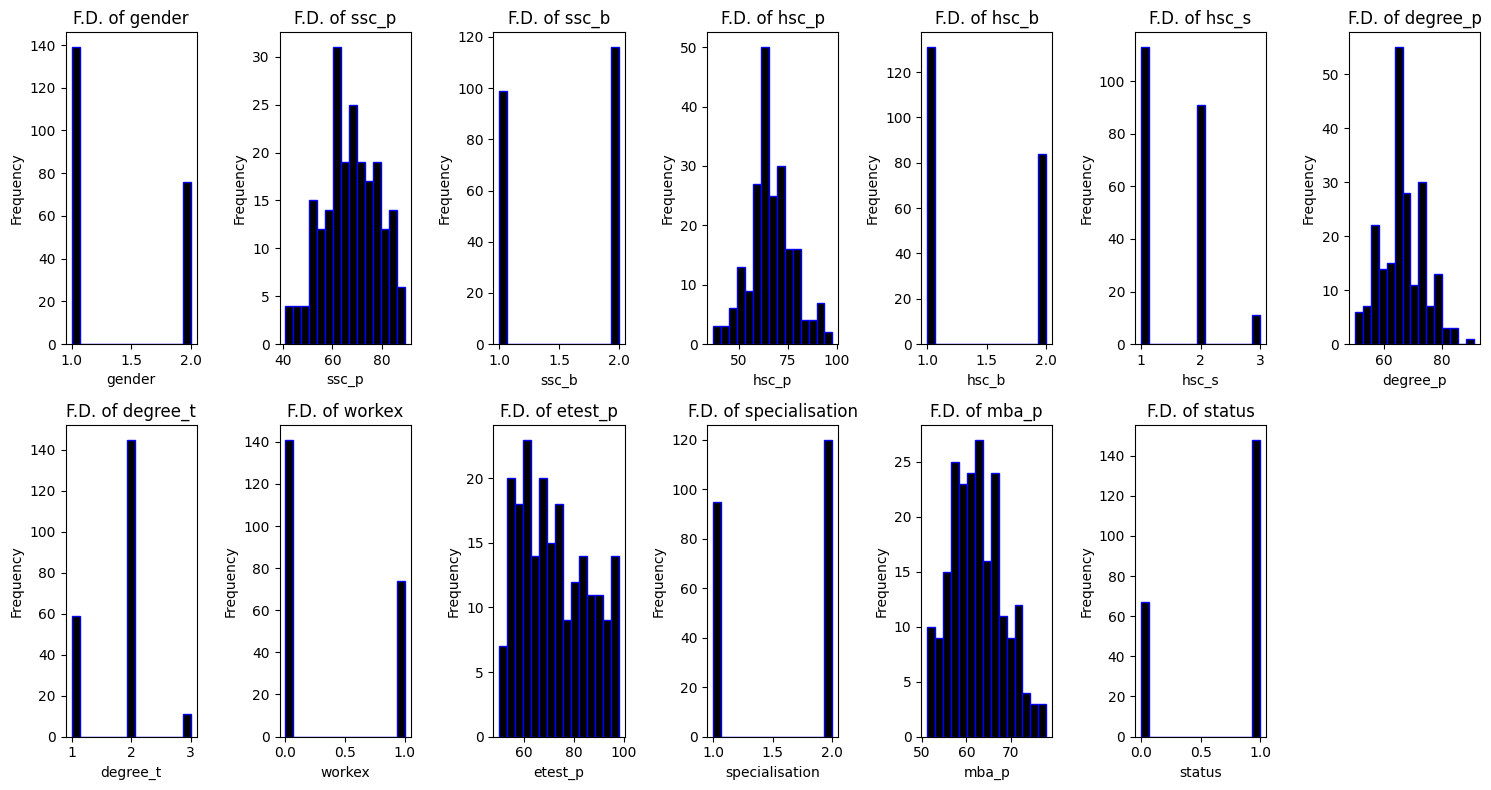

In [5]:
# write task-3 solution

# start writing your code here

fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(15, 8))


axes = axes.flatten()


for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=15, color='black', edgecolor='blue')
    axes[i].set_title(f'F.D. of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for i in range(len(df.columns), len(axes)):
    axes[i].axis('off')


plt.tight_layout()


plt.show()

•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

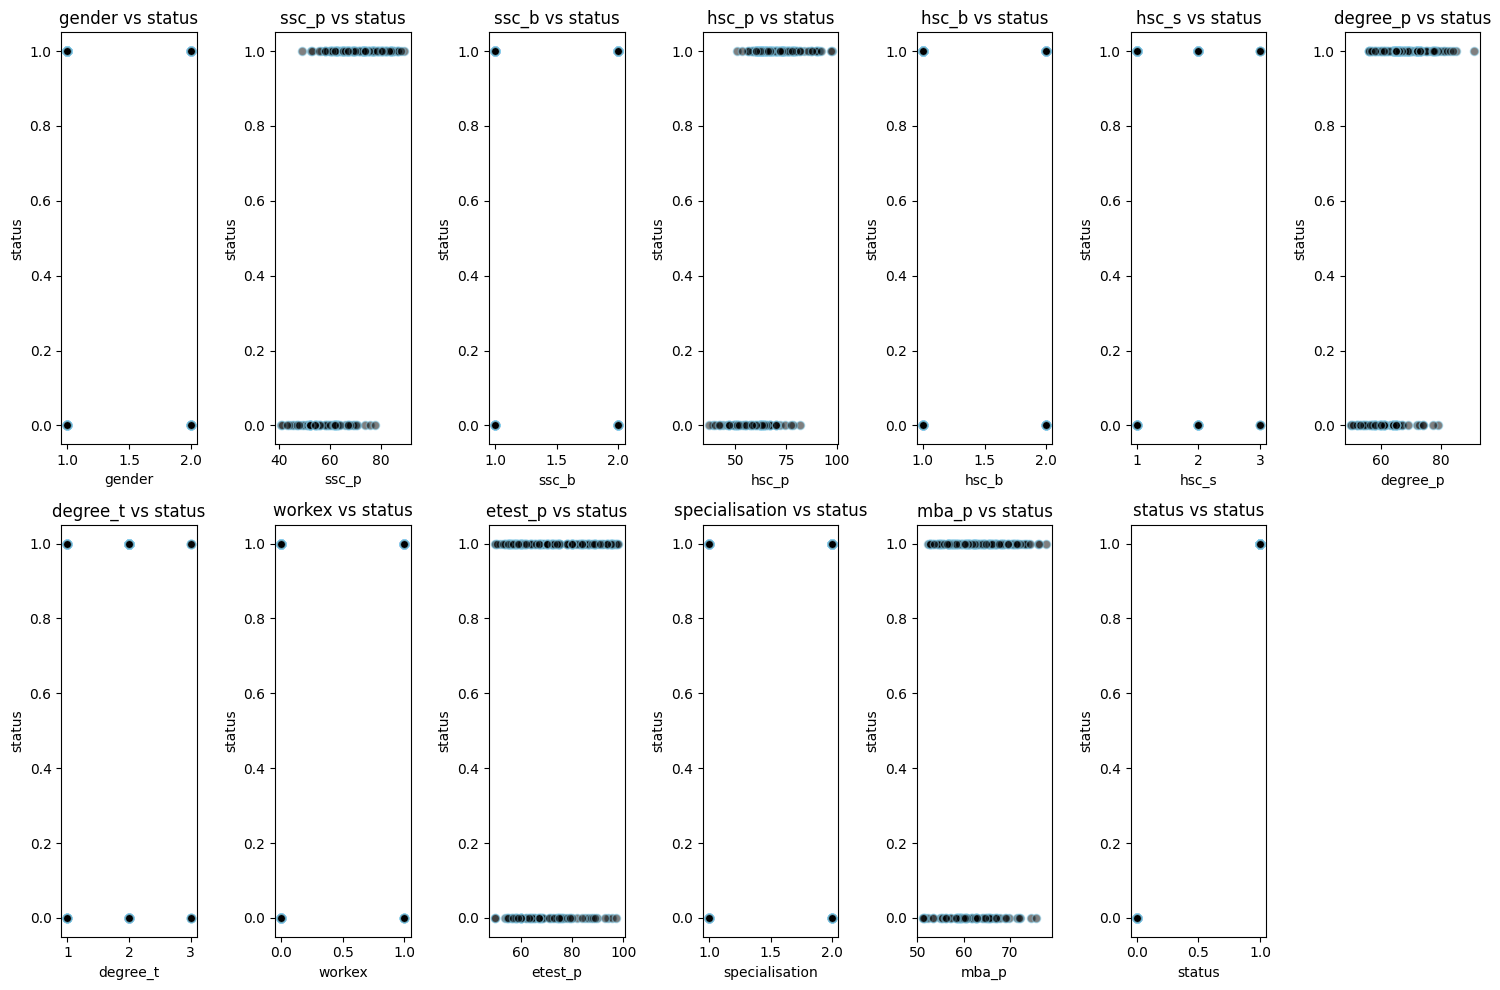

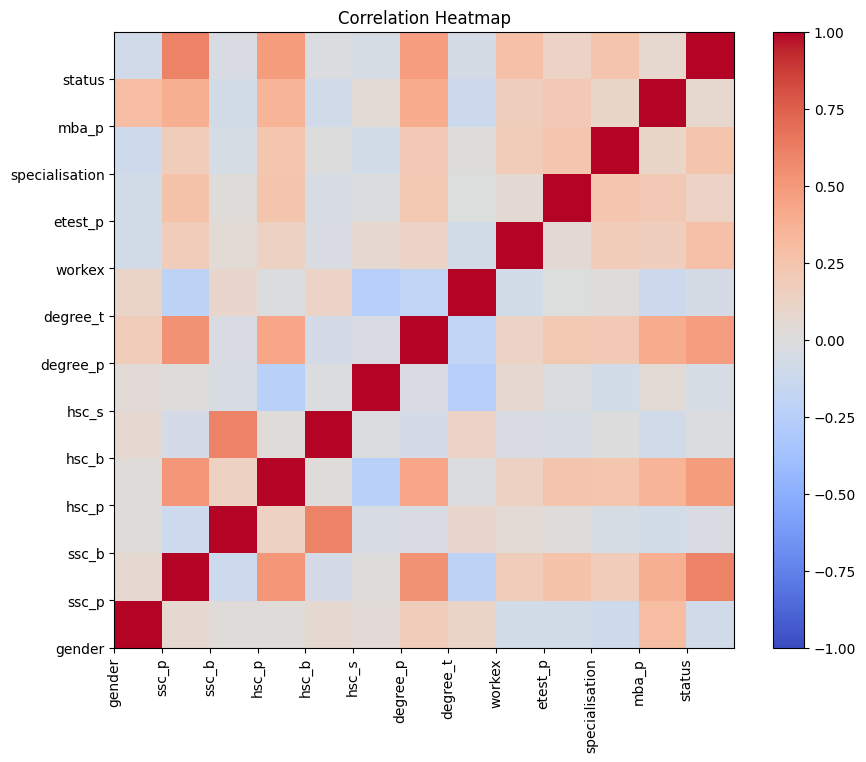

In [6]:
# write task-4 solution

# start writing your code here


fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(15, 10))


axes = axes.flatten()


target_column = 'status'

for i, column in enumerate(df.columns):
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        axes[i].scatter(df[column], df[target_column], color='black', edgecolor='skyblue', alpha=0.5)
        axes[i].set_title(f'{column} vs {target_column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel(target_column)

for i in range(len(df.columns), len(axes)):
    axes[i].axis('off')


plt.tight_layout()


plt.show()


correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))

heatmap = ax.pcolor(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
cbar = plt.colorbar(heatmap)

ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation='vertical')
ax.set_yticklabels(correlation_matrix.columns)
plt.title('Correlation Heatmap')

plt.show()


•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [7]:
# write task-5 solution

# start writing your code here


numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns[numeric_columns != 'status']

scaler = StandardScaler()

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("DataFrame after scaling:")
print(df)


DataFrame after scaling:
       gender     ssc_p     ssc_b     hsc_p     hsc_b     hsc_s  degree_p  \
0   -0.739434 -0.028087 -1.082459  2.268812 -0.800763 -0.886281 -1.140102   
1   -0.739434  1.113369  0.923823  1.103448 -0.800763  0.800006  1.513267   
2   -0.739434 -0.213238  0.923823  0.153313  1.248809  2.486294 -0.322843   
3   -0.739434 -1.046417  0.923823 -1.318339  1.248809  0.800006 -1.957362   
4   -0.739434  1.712332  0.923823  0.668391  1.248809 -0.886281  0.943909   
..        ...       ...       ...       ...       ...       ...       ...   
210 -0.739434  1.230940 -1.082459  1.441008 -0.800763 -0.886281  1.529612   
211 -0.739434 -0.861266 -1.082459 -0.582513 -0.800763  0.800006  0.766836   
212 -0.739434 -0.028087 -1.082459  0.061335 -0.800763 -0.886281  0.903046   
213  1.352386  0.619941 -1.082459 -0.030644 -0.800763 -0.886281 -1.140102   
214 -0.739434 -0.490964  0.923823 -0.766470 -0.800763  0.800006 -1.821152   

     degree_t    workex   etest_p  specialisation 

•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 123 as the value of the random_state parameter of this function.

In [8]:
# write task-6 solution

# start writing your code here


df_numeric = df.select_dtypes(include=['float64', 'int64']).dropna()
df_numeric = df_numeric.sample(frac=1,random_state=5).reset_index(drop=True)


X = df_numeric.drop('status', axis=1)
y = df_numeric['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)


Training set shape (X, y): (172, 12) (172,)
Testing set shape (X, y): (43, 12) (43,)


•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [9]:
# write task-7 solution

# start writing your code here

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.7209302325581395

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.56      0.60        16
           1       0.76      0.81      0.79        27

    accuracy                           0.72        43
   macro avg       0.70      0.69      0.69        43
weighted avg       0.72      0.72      0.72        43



•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

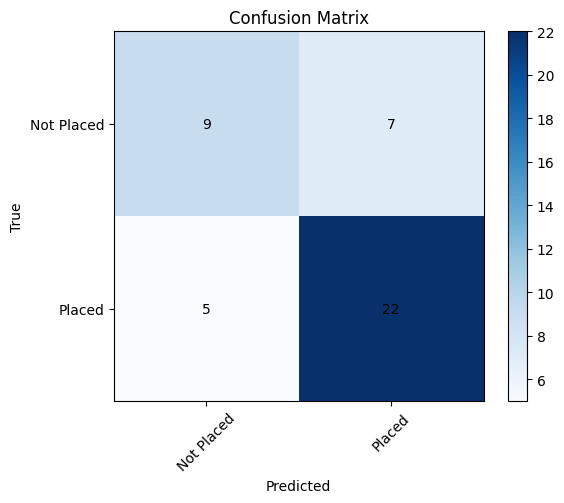

In [10]:
# write task-8 solution

# start writing your code here

conf_matrix = confusion_matrix(y_test, y_pred)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Not Placed', 'Placed']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.show()

•	**Task 9:** Calculate the accuracy, precision, recall and f-1 score of your model.

In [11]:
# write task-9 solution

# start writing your code here

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7209302325581395
Precision: 0.7586206896551724
Recall: 0.8148148148148148
F1 Score: 0.7857142857142857


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [12]:
# write task-10 solution

# start writing your code here

nb_classifier = GaussianNB()

cv_scores = cross_val_score(nb_classifier, X, y, cv=10)

for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: Accuracy = {score}")

average_accuracy = cv_scores.mean()
print("\nAverage Accuracy:", average_accuracy)

Fold 1: Accuracy = 0.8636363636363636
Fold 2: Accuracy = 0.8636363636363636
Fold 3: Accuracy = 0.8181818181818182
Fold 4: Accuracy = 0.8181818181818182
Fold 5: Accuracy = 0.7727272727272727
Fold 6: Accuracy = 0.9047619047619048
Fold 7: Accuracy = 0.8571428571428571
Fold 8: Accuracy = 0.8571428571428571
Fold 9: Accuracy = 0.7619047619047619
Fold 10: Accuracy = 0.6666666666666666

Average Accuracy: 0.8183982683982685
